In [1]:
import numpy as np
import pandas as pd

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [2]:

# Try reading with a different encoding
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')



In [3]:
df.head(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1.data cleaning
# 2.EDA
# 3.text preprocessing
# 4.model building
# 5.Evaluation 
# 6.improvement
# 7. demo webiste create

## 1.Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample()

,v1,v2
406,ham,All was well until slightly disastrous class t...


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
1837,ham,And how's your husband.
5098,spam,TheMob>Hit the link to get a premium Pink Pant...
2907,ham,Why must we sit around and wait for summer day...
3236,ham,Ron say fri leh. N he said ding tai feng cant ...
5252,ham,You do your studies alone without anyones help...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
## missing values check

df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
## duplicadted value check

df.duplicated().sum()

403

In [16]:
## drop duplicated value

df =df.drop_duplicates(keep = 'first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## 2. EDA

In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

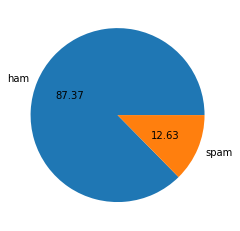

In [20]:
## check in cleary ham, spam to pyplot 

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct= "%0.2f")
plt.show()

In [21]:
## data is imblanced
# deeper analysis

In [22]:
import nltk

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rumon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)    # count how len number characters of this text column

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# deeply count num of words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
## count sentence of text column

df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# ham message

df[df['target']  == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# spam message

df[df['target']  == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
# now we check cleary ham and spam data on histogram

import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

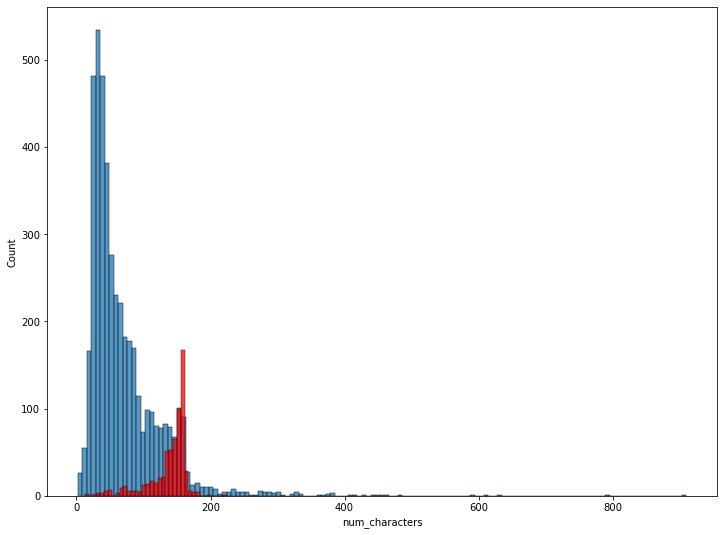

In [34]:
plt.figure(figsize=(12,9))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

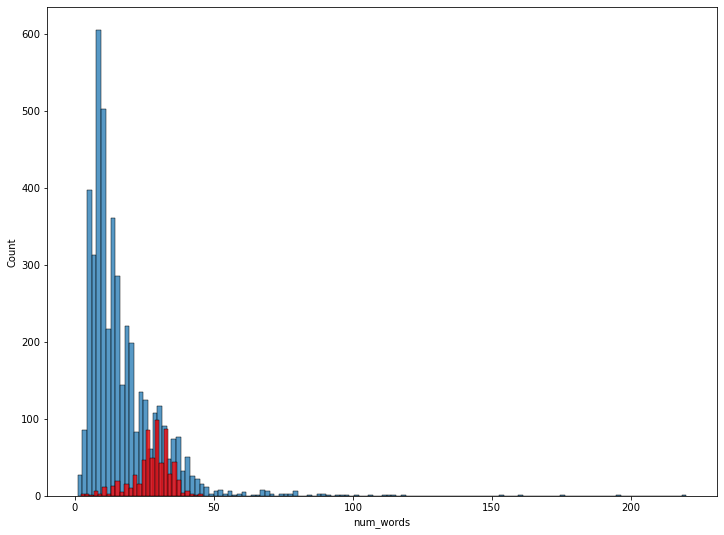

In [35]:
plt.figure(figsize=(12,9))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')

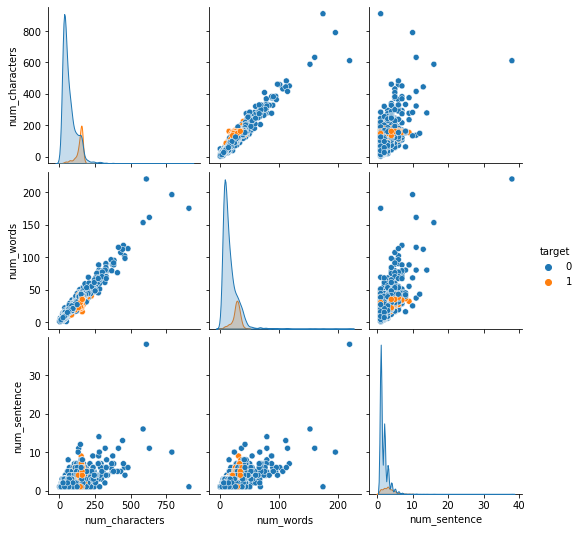

In [36]:
sns.pairplot(df,hue = 'target')

<AxesSubplot:>

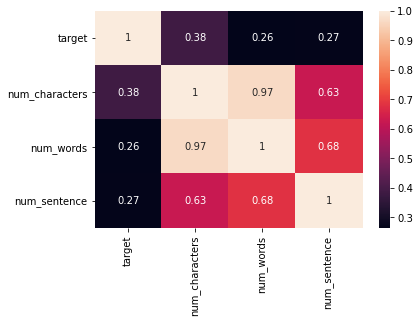

In [37]:
sns.heatmap(df.corr(),annot=True)

## 3.Data preprocessing
    .Lower case
    .Tokenization
    .Removing special characters
    .Removing stop words and punctuation
    .Stemming

In [38]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [39]:
# Data preprocessing function create
# lower case
# tokenization
def transform_text(text):
    text = text.lower()              #1. lower case
    text = nltk.word_tokenize(text)  #2. tokenization
    
    y = []
    for i in text:
        if i.isalnum():                # alnum = alpha numeric
            y.append(i)                # 3.removing special characters
    
    text = y[:]                        # y[:] = this sign y is clone copy and store text
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:      # removing stopwords and punctuation(?)
            y.append(i)
            
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string               #check punctuation mark 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
transform_text('hi how are you. my name is rumon, age is 25% years. i loved machine learning and new chalanging things')

'hi name rumon age 25 year love machin learn new chalang thing'

In [43]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [44]:
df['transform_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
# now we creat wordcloud . it means show the important words(ham,spam) written in large size
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(width = 300,min_font_size = 10, background_color = 'white')

In [47]:
# Prepare the text data
# spam_text_data = df[df['target'] == 1]['transform_text'].astype(str).fillna("").str.cat(sep="")

# Generate the word cloud
# spam_wc = WordCloud(width=500, min_font_size=10, background_color='white').generate(spam_text_data)

# Display the word cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(spam_wc, interpolation="bilinear")
# plt.axis("off")
# plt.show()


# now we create spam==1 wordcloud
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].astype(str).fillna("").str.cat(sep=""))




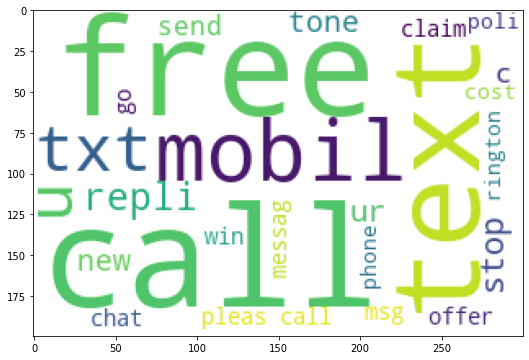

In [48]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [49]:
# now we create HAM == 0  wordcloud
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].astype(str).fillna("").str.cat(sep=""))

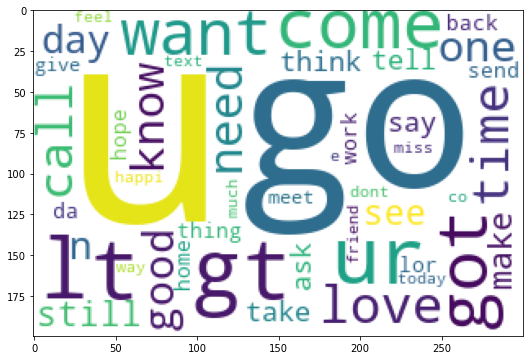

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
# now we select a spam common  use top 50 words

# 1.first we target our spam message list ['transform_text'] colum
# 2. then we convert to list() formate
# 3. then we pass a for loop

spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].astype(str).fillna("").tolist():
    for word in msg.split():
        spam_corpus.append(word)



In [53]:
# 9939 words
len(spam_corpus)

9939

C:\Users\rumon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


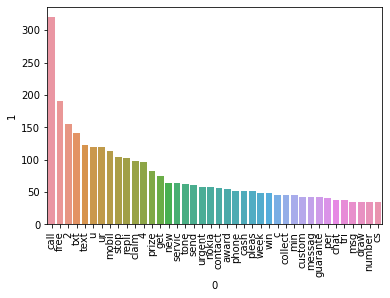

In [54]:
# import collection libray 
# now counting in common words

from collections import Counter

# firstly count common 50 words then convert into a dataframe
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(40))[0],pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation = 'vertical')  # read cleary this commend

plt.show()

In [55]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].astype(str).fillna("").tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [56]:
len(ham_corpus)

35402

C:\Users\rumon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


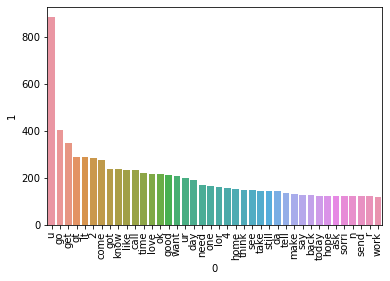

In [57]:
# import collection libray 
# now counting in common words

from collections import Counter

# firstly count common 50 words then convert into a dataframe
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(40))[0],pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation = 'vertical')  # read cleary this commend

plt.show()

## model building

In [212]:
# text vectorize [using bag of words then input naive base]

df.head()

,target,text,num_characters,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [213]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()  # bag of words


# Initialize and fit the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Ensure the 'transform_text' column is processed and ready
# df['transform_text'] = df['transform_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x)



In [214]:
# Fit the vectorizer on the entire text data and transform it
X = tfidf.fit_transform(df['transform_text']).toarray()

In [216]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [217]:
# using minmaxscaler  for scaling performance 
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [218]:
X.shape  # sms= 5169, words = 6708 

(5169, 3000)

In [219]:
y = df['target'].values

In [220]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [221]:
# now call train , test split
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [222]:
# data distribution
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [223]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [224]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [181]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [182]:
## check accuracy by another model training

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [184]:
lr = LogisticRegression(solver='liblinear', penalty='l1') 
svc = SVC(kernel = 'sigmoid',gamma =1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt= GradientBoostingClassifier(n_estimators = 50, random_state = 2)
XGBoost = XGBClassifier(n_estimators=50, random_state=2)

In [185]:
# key = algorithm name, value = object
clfs = {
    'LR': lr,
    'SVC' : svc,
    'NB' : mnb,
    'DT' : dtc,
    'KN' : knc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' :  bc,
    'ETC' : etc,
    'GBDT': gbdt,
    'xgb' : XGBoost
}

In [186]:
def train_Classifier (clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [187]:
# train_Classifier(svc,x_train,y_train,x_test,y_test)

In [188]:
# Lists to store the results

accuracy_scores = []
precision_scores = []
algorithm_names = []

# Loop through the classifiers and collect accuracy/precision
for name, classifier in clf.items():
    # Pass the current classifier (classifier) to the function, not the whole dictionary (clf) 
    current_accuracy,current_precision = train_Classifier(classifier,X_train,y_train,X_test,y_test)
    
    print("for" ,name)
    print("Accuracy", current_accuracy)
    print("Precision" , current_precision)
    
    # Append the results
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    algorithm_names.append(name)
    
# Create a DataFrame with the results
# algorithm_performance_df
# max_features_algorithm_df
#minmax_scaling_algorithm_df
max_features_algorithm_df= pd.DataFrame({
    'algorithm_name': clfs.keys(),  # Use the stored names
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False) 
    

for LR
Accuracy 0.9584139264990329
Precision 0.9702970297029703
for SVC
Accuracy 0.9758220502901354
Precision 0.9747899159663865
for NB
Accuracy 0.9709864603481625
Precision 1.0
for DT
Accuracy 0.9313346228239845
Precision 0.8252427184466019
for KN
Accuracy 0.9052224371373307
Precision 1.0
for RF
Accuracy 0.9758220502901354
Precision 0.9829059829059829
for AdaBoost
Accuracy 0.960348162475822
Precision 0.9292035398230089
for BgC
Accuracy 0.9584139264990329
Precision 0.8682170542635659
for ETC
Accuracy 0.9748549323017408
Precision 0.9745762711864406
for GBDT
Accuracy 0.9468085106382979
Precision 0.9191919191919192
for xgb
Accuracy 0.9671179883945842
Precision 0.9262295081967213


In [189]:
#algorithm_performance_df
max_features_algorithm_df
#minmax_scaling_algorithm_df

,algorithm_name,Accuracy,Precision
2,NB,0.970986,1.000000
4,KN,0.905222,1.000000
5,RF,0.975822,0.982906
1,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
0,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [190]:
# algorithm_performance_df1 = pd.melt(algorithm_performance_df, id_vars = "algorithm_name")

max_performance_df = pd.melt(max_features_algorithm_df, id_vars="algorithm_name", var_name="Metric", value_name="Score")
#scaler_performance_df = pd.melt(minmax_scaling_algorithm_df, id_vars="algorithm_name", var_name="Metric", value_name="Score")


In [191]:
# algorithm_performance_df1
max_performance_df
#scaler_performance_df

,algorithm_name,Metric,Score
0,NB,Accuracy,0.970986
1,KN,Accuracy,0.905222
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


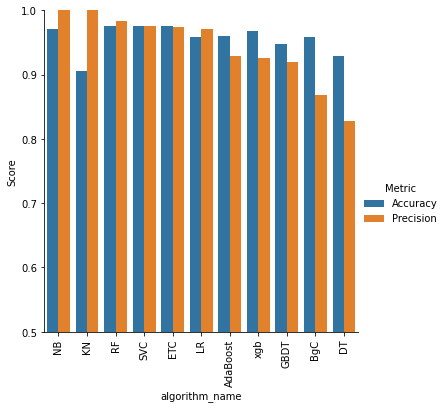

In [192]:
sns.catplot(x='algorithm_name',y ='Score',hue='Metric',data = max_performance_df ,kind = 'bar', height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [193]:
# model improve
# 1.change the max_features parameter of Tfidf
# 2. apply minmax_scaler

In [194]:
max_ft_3000 = pd.DataFrame({'algorithm_name':clfs.keys(),'accuracy_max_ft_3000':accuracy_scores,'precision_max_ft_3000':precision_scores}).sort_values('precision_max_ft_3000', ascending=False) 

In [195]:
algorithm_max_features_df = algorithm_performance_df.merge(max_ft_3000,on = 'algorithm_name')

In [197]:
algorithm_max_features_df

,algorithm_name,Accuracy,Precision,accuracy_max_ft_3000,precision_max_ft_3000
0,NB,0.959381,1.000000,0.970986,1.000000
1,KN,0.900387,1.000000,0.905222,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217


In [198]:
# minmax_scaler_df = pd.DataFrame({'algorithm_name':algorithm_names,'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling', ascending=False) 

In [199]:
# minmax_scaler_df

In [200]:
algorithm_max_features_scaling_df = algorithm_max_features_df.merge(minmax_scaler_df,on = 'algorithm_name')

In [201]:
algorithm_max_features_scaling_df

,algorithm_name,Accuracy,Precision,accuracy_max_ft_3000,precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
1,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.970019,0.928000
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217


In [202]:
# voting classifier for good result
    
from sklearn.ensemble import VotingClassifier

svc = SVC(kernel = 'sigmoid', gamma = 1.0,probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


In [203]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('etc',etc)],voting = 'soft')

In [204]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [205]:
y_pre = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pre))
print("Precision", precision_score(y_test,y_pre))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [206]:
# Applying stacking (votaize decided to check improve accuracy,precision!)

from sklearn.ensemble import StackingClassifier
estimators = [('svm',svc),('nb',mnb),('Etc',etc)]
final_estimator = RandomForestClassifier()

In [207]:
stacking_clf = StackingClassifier(estimators = estimators,final_estimator= final_estimator)

In [209]:
stacking_clf.fit(X_train,y_train) #model train


StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('Etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [211]:
y_pred = stacking_clf.predict(X_test) # model predict
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [225]:
import pickle
pickle.dump(tfidf,open('tfidf_vectorizer.pkl','wb'))
pickle.dump(mnb,open('mnb_model.pkl', 'wb'))

